In [287]:

import matplotlib.pyplot as plt
import pickle as pkl
from torch import Tensor
import torch
import numpy as np
from annotations import get_annotations, has_class
import load_path
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [288]:
BM_D_NO_DS_PATH = '../tmp/bm-d-no-ds'
BM_D_NO_DS_PKL_FILES = os.listdir(BM_D_NO_DS_PATH) 

BM_ANT_NO_DS_PATH = '../tmp/bm-ant-no-ds'
BM_ANT_NO_DS_PKL_FILES = os.listdir(BM_ANT_NO_DS_PATH) 

In [289]:
f_plot = BM_D_NO_DS_PKL_FILES[4]
with open(f'{BM_D_NO_DS_PATH}/{f_plot}', 'rb') as file:
    S1, S2 = pkl.load(file)
anns = get_annotations(f_plot[:-4], 0, 1e6, 'D')
print(anns)

[{'class': 'D', 't_start': 321.864, 't_end': 325.732, 'f_start': 27.6, 'f_end': 71.5, 'overlap': 1.0, 'duration': 3.868000000000052, 'freq_range': 43.9}, {'class': 'D', 't_start': 329.5, 't_end': 332.692, 'f_start': 28.0, 'f_end': 68.7, 'overlap': 1.0, 'duration': 3.1920000000000073, 'freq_range': 40.7}, {'class': 'D', 't_start': 342.524, 't_end': 344.252, 'f_start': 32.0, 'f_end': 69.4, 'overlap': 1.0, 'duration': 1.7280000000000086, 'freq_range': 37.400000000000006}, {'class': 'D', 't_start': 356.596, 't_end': 359.788, 'f_start': 35.9, 'f_end': 81.7, 'overlap': 1.0, 'duration': 3.1920000000000073, 'freq_range': 45.800000000000004}, {'class': 'D', 't_start': 643.152, 't_end': 647.496, 'f_start': 15.9, 'f_end': 80.0, 'overlap': 1.0, 'duration': 4.343999999999937, 'freq_range': 64.1}, {'class': 'D', 't_start': 661.376, 't_end': 663.628, 'f_start': 39.6, 'f_end': 71.5, 'overlap': 1.0, 'duration': 2.2520000000000664, 'freq_range': 31.9}, {'class': 'D', 't_start': 683.036, 't_end': 685.756

In [290]:
def s1_to_img(S1, fs=250):
    X = []
    f = []
    for _lambda in sorted(S1.keys()):
        X.append(S1[_lambda][:, None])
        f.append(_lambda / np.pi / 2 * fs)
    X = torch.concat(X, dim=1).numpy().T
    return np.arange(X.shape[1]) / fs, f, X

In [291]:
t, f, x = s1_to_img(S1)
x.shape

(16, 899965)

[Text(0, 30.0, '30.0'),
 Text(0, 37.8125, '37.8'),
 Text(0, 45.62500000000001, '45.6'),
 Text(0, 54.257574621999154, '54.3'),
 Text(0, 64.52349378327247, '64.5'),
 Text(0, 76.73179789190148, '76.7'),
 Text(0, 91.25000000000003, '91.3'),
 Text(0, 108.51514924399834, '108.5')]

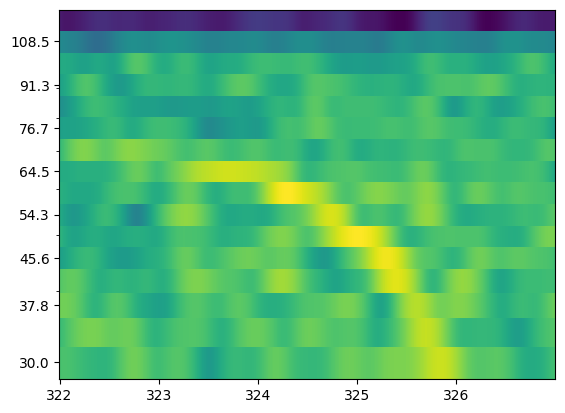

In [294]:
n1 = 250*322
N = 250*5
n2 = n1 + N
T, F = np.meshgrid(t[n1:n2], f)
plt.pcolor(T, F, np.log(x[:, n1:n2]))
plt.gca().set_yscale('log')
from matplotlib.ticker import ScalarFormatter, NullFormatter
plt.gca().get_yaxis().set_major_formatter(NullFormatter())
plt.gca().get_yaxis().set_minor_formatter(NullFormatter())
plt.gca().set_yticks(f[::2])
plt.gca().set_yticklabels([f'{fi:.1f}' for fi in f[::2]])
# plt.gca().set_yticks([], [])
# plt.show()


[Text(0, 3.90625, '3.9'), Text(0, 11.71875, '11.7')]

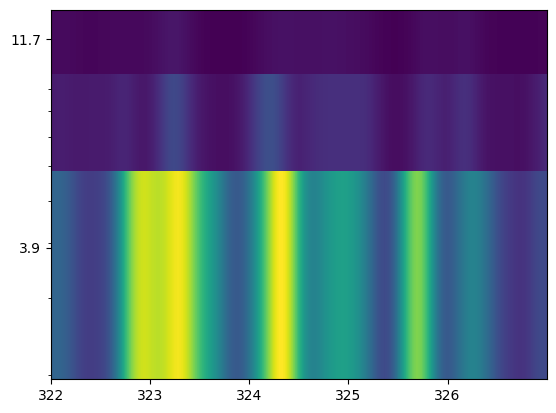

In [305]:
t2, f2, x2 = s1_to_img(list(S2.values())[8])
T, F = np.meshgrid(t2[n1:n2], f2)
plt.pcolor(T, F, x2[:, n1:n2])
plt.gca().set_yscale('log')
from matplotlib.ticker import NullFormatter
plt.gca().get_yaxis().set_major_formatter(NullFormatter())
plt.gca().get_yaxis().set_minor_formatter(NullFormatter())
plt.gca().set_yticks(f2[::2])
plt.gca().set_yticklabels([f'{fi:.1f}' for fi in f2[::2]])